In [20]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import addict
import pickle
import scipy.io as sio
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm

from matplotlib.colors import Normalize
from importlib import reload
from rich import print as print

import celeri

plt.rcParams["text.usetex"] = False

In [22]:
def read_run(folder_name):
    """
    Reads and loads data from a specified folder containing a pickled file.

    This function opens a pickled file located in the directory `./../runs/{folder_name}/`,
    where `{folder_name}` is provided as an argument. The pickled file is expected to contain
    a list of six elements, which are extracted and returned as separate variables.

    Parameters:
    folder_name (str): The name of the folder containing the pickled file.

    Returns:
    tuple: A tuple containing the following elements in order:
        - command: command dictionary.
        - estimation: estimation command dictionary.
        - station: station dataframe.
        - segment: segment dataframe.
        - block: block dataframe.
        - meshes: meshes list.

    Example:
    >>> command, estimation, station, segment, block, meshes = read_run('example_folder')
    """
    pickle_file = open(f"{folder_name}/output.pkl", "rb")
    pickle_data = pickle.load(pickle_file)
    command = pickle_data[0]
    estimation = pickle_data[1]
    station = pickle_data[2]
    segment = pickle_data[3]
    block = pickle_data[4]
    meshes = pickle_data[5]
    del pickle_data
    return command, estimation, station, segment, block, meshes


run_folder = celeri.get_newest_run_folder()
command, estimation, station, segment, block, meshes = read_run(run_folder)

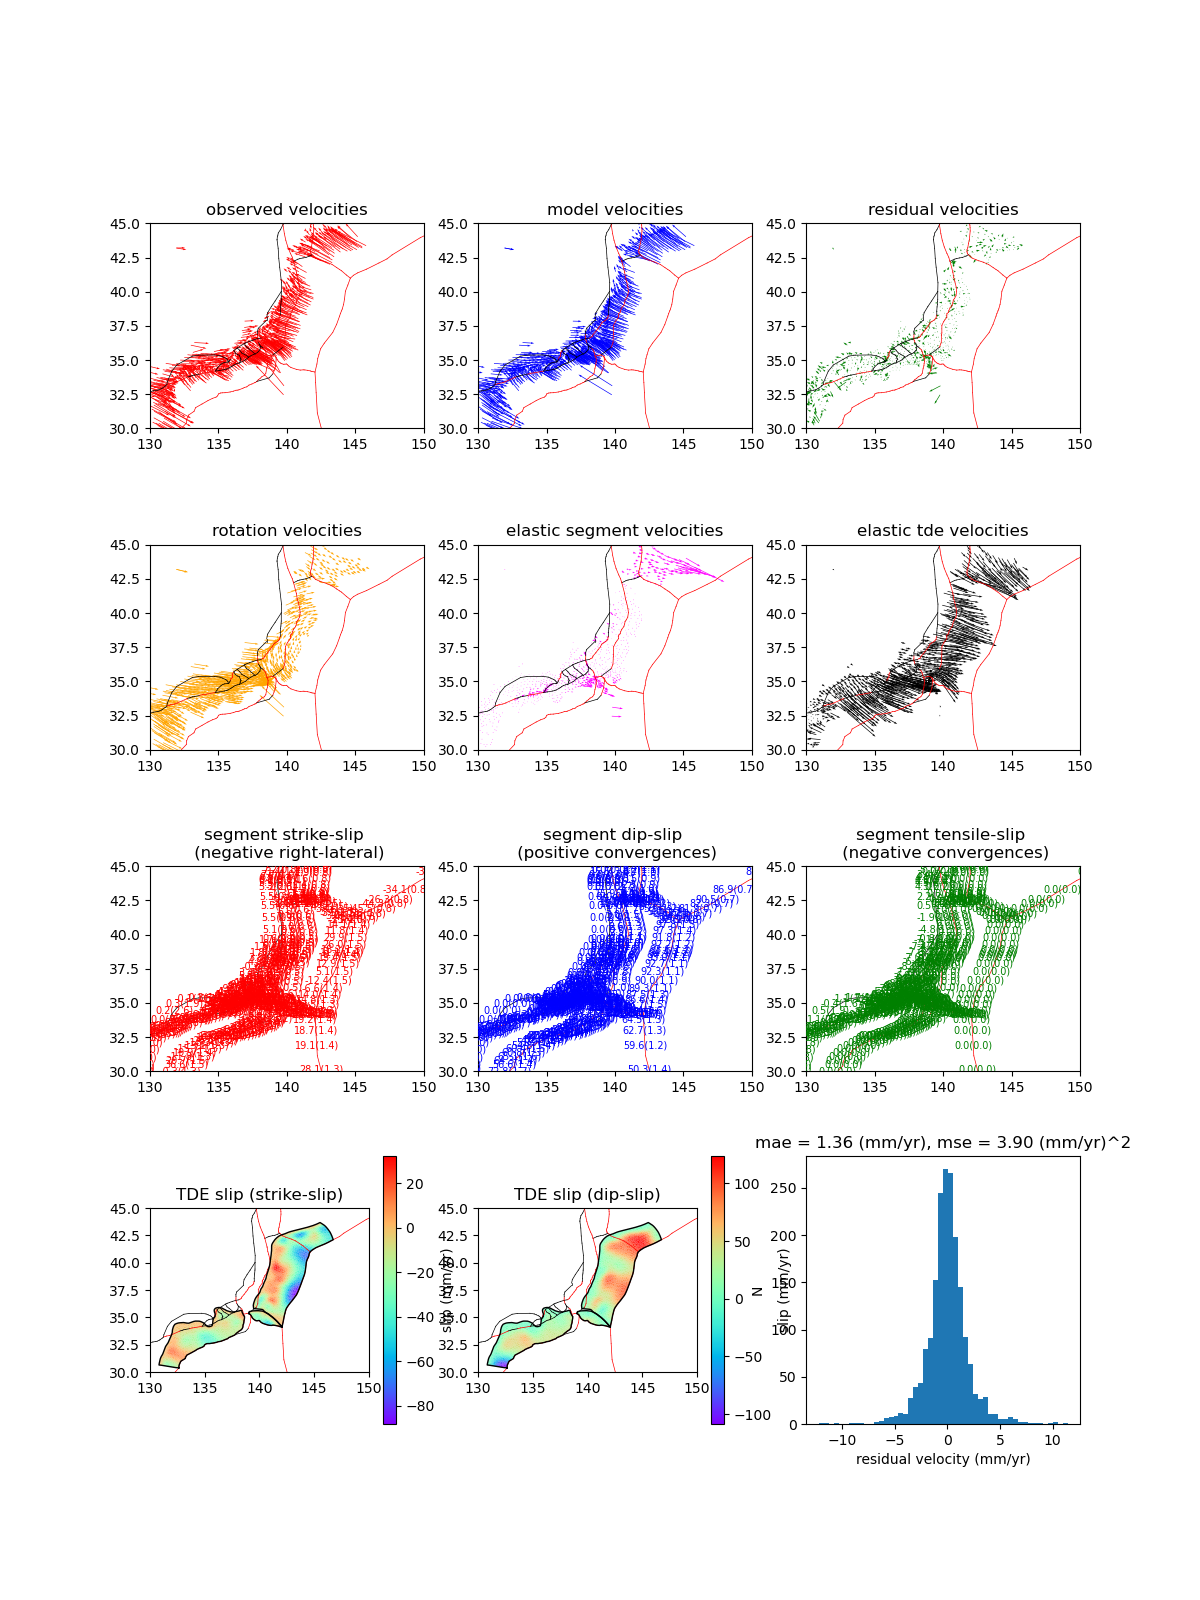

2024-07-11 15:42:52.718 | SUCCESS  | celeri.celeri:plot_estimation_summary:5521 - Wrote figures../runs/0000000008/plot_estimation_summary.(pdf, png)


In [23]:
celeri.plot_estimation_summary(
    command,
    segment,
    station,
    meshes,
    estimation,
    lon_range=command.lon_range,
    lat_range=command.lat_range,
    quiver_scale=command.quiver_scale,
)

In [85]:
def get_default_plotting_dict(command, estimation, station):
    """
    Parameters:
    -----------
    estimation : dictionary
    station : dataframe
    command : dictionary

    Returns:
    --------
    p : dictionary

    The returned dictionary includes the following keys and their default values:
        - WORLD_BOUNDARIES: Data loaded from "WorldHiVectors.mat".
        - FIGSIZE_VECTORS: (12, 6) - Default figure size for vector plots.
        - FONTSIZE: 16 - Default font size.
        - LON_RANGE: - Inferred from command.
        - LAT_RANGE: - Inferred from command.
        - LON_TICKS: - Inferred from command.
        - LAT_TICKS: - Inferred from command.
        - SLIP_RATE_MIN: - Inferred from estimation.
        - SLIP_RATE_MAX: - Inferred from estimation.
        - LAND_COLOR: "lightgray" - Color of land areas.
        - LAND_LINEWIDTH: 0.5 - Line width for land boundaries.
        - LAND_ZORDER: 0 - Z-order for land boundaries.
        - KEY_RECTANGLE_ANCHOR: [0, -90] - Anchor point for the key rectangle.
        - KEY_RECTANGLE_WIDTH: 3.0 - Width of the key rectangle.
        - KEY_RECTANGLE_HEIGHT: 1.55 - Height of the key rectangle.
        - KEY_ARROW_LON: 5.0 - Inferred from command.
        - KEY_ARROW_LAT: -85.0 - Inferred from command.
        - KEY_ARROW_MAGNITUDE: - Magnitude for the key arrow.
        - KEY_ARROW_TEXT: - Text for the key arrow.
        - KEY_ARROW_COLOR: "k" - Color for the key arrow.
        - KEY_BACKGROUND_COLOR: "white" - Background color for the key.
        - KEY_LINEWIDTH: 1.0 - Line width for the key.
        - KEY_EDGECOLOR: "k" - Edge color for the key.
        - ARROW_MAGNITUDE_MIN: 0.0 - Minimum arrow magnitude.
        - ARROW_MAGNITUDE_MAX: - Maximum arrow magnitude (inferred from command).
        - ARROW_COLORMAP: cm.plasma - Colormap for arrows.
        - ARROW_SCALE: - Inferred from command.
        - ARROW_WIDTH: 0.0025 - Width for arrows.
        - ARROW_LINEWIDTH: 0.5 - Line width for arrows.
        - ARROW_EDGECOLOR: "k" - Edge color for arrows.
        - SEGMENT_LINE_WIDTH_OUTER: 2.0 - Outer line width for segments.
        - SEGMENT_LINE_WIDTH_INNER: 1.0 - Inner line width for segments.
        - SEGMENT_LINE_COLOR_OUTER: "k" - Outer line color for segments.
        - SEGMENT_LINE_COLOR_INNER: "w" - Inner line color for segments.

    """

    slip_rate_scale = 0.5 * np.max(
        (
            np.abs(estimation.strike_slip_rates),
            np.abs(estimation.dip_slip_rates),
            np.abs(estimation.tensile_slip_rates),
        )
    )

    vel_scale = np.round(
        0.6
        * np.max(
            (
                np.abs(station.east_vel),
                np.abs(station.north_vel),
            )
        )
    )
    vel_scale = round(vel_scale / 5) * 5

    p = addict.Dict()
    p.WORLD_BOUNDARIES = sio.loadmat("WorldHiVectors.mat")
    p.FIGSIZE_VECTORS = (12, 6)
    p.FONTSIZE = 16
    p.LON_RANGE = command.lon_range
    p.LAT_RANGE = command.lat_range
    p.LON_TICKS = np.linspace(command.lon_range[0], command.lon_range[1], 3)
    p.LAT_TICKS = np.linspace(command.lat_range[0], command.lat_range[1], 3)
    p.SLIP_RATE_MIN = -slip_rate_scale
    p.SLIP_RATE_MAX = slip_rate_scale
    p.LAND_COLOR = "lightgray"
    p.LAND_LINEWIDTH = 0.5
    p.LAND_ZORDER = 0
    p.KEY_RECTANGLE_ANCHOR = [0, -90]
    p.KEY_RECTANGLE_WIDTH = 3.0
    p.KEY_RECTANGLE_HEIGHT = 1.55
    p.KEY_ARROW_LON = np.mean(command.lon_range)
    p.KEY_ARROW_LAT = np.min(command.lat_range) + 0.05 * (
        command.lat_range[1] - command.lat_range[0]
    )
    p.KEY_ARROW_MAGNITUDE = vel_scale
    p.KEY_ARROW_TEXT = f"{vel_scale:d} mm/yr"
    p.KEY_ARROW_COLOR = "k"
    p.KEY_BACKGROUND_COLOR = "white"
    p.KEY_LINEWIDTH = 1.0
    p.KEY_EDGECOLOR = "k"
    p.ARROW_MAGNITUDE_MIN = 0.0
    p.ARROW_MAGNITUDE_MAX = 0.35 * vel_scale
    p.ARROW_COLORMAP = cm.plasma
    p.ARROW_SCALE = vel_scale
    p.ARROW_WIDTH = 0.0025
    p.ARROW_LINEWIDTH = 0.5
    p.ARROW_EDGECOLOR = "k"
    p.SEGMENT_LINE_WIDTH_OUTER = 2.0
    p.SEGMENT_LINE_WIDTH_INNER = 1.0
    p.SEGMENT_LINE_COLOR_OUTER = "k"
    p.SEGMENT_LINE_COLOR_INNER = "w"
    return p


# Get a default plotting parameter dictionary
p = get_default_plotting_dict(command, estimation, station)

In [87]:
def plot_common_elements(p, segment, lon_range, lat_range):
    """
    Plots common map elements such as segments and axis settings.

    This function plots map segments as lines and sets the longitude and latitude
    ranges and ticks for the plot. It also adjusts the aspect ratio and sets labels
    and tick parameters.

    Parameters:
    p (dictionary): Plotting parameters
    segment (DataFrame): A DataFrame containing segment information with columns
                         'lon1', 'lon2', 'lat1', and 'lat2' representing the
                         starting and ending coordinates of each segment.
    lon_range (tuple): A tuple specifying the longitude range as (min_lon, max_lon).
    lat_range (tuple): A tuple specifying the latitude range as (min_lat, max_lat).

    The function performs the following steps:
    1. Plots the outer segment lines in black with a specified line width.
    2. Plots the inner segment lines in white with a specified line width.
    3. Sets the x and y axis limits to the provided longitude and latitude ranges.
    4. Sets the x and y axis ticks to predefined values.
    5. Adjusts the aspect ratio to be equal.
    6. Sets the x and y axis labels and their font sizes.
    7. Sets the tick parameters, including the label size.
    """
    for i in range(len(segment)):
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-k",
            linewidth=p.SEGMENT_LINE_WIDTH_OUTER,
        )
    for i in range(len(segment)):
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-w",
            linewidth=p.SEGMENT_LINE_WIDTH_INNER,
        )

    plt.xlim([lon_range[0], lon_range[1]])
    plt.ylim([lat_range[0], lat_range[1]])
    plt.xticks(p.LON_TICKS)
    plt.yticks(p.LAT_TICKS)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlabel("longitude (degrees)", fontsize=p.FONTSIZE)
    plt.ylabel("latitude (degrees)", fontsize=p.FONTSIZE)
    plt.tick_params(labelsize=p.FONTSIZE)


def plot_vel_arrows_elements(p, lon, lat, east_velocity, north_velocity, arrow_scale):
    """
    Plots velocity vectors as arrows on a map along with other map elements.

    This function plots velocity vectors given eastward and northward components
    of velocity, scaling the arrows appropriately. It also draws land boundaries,
    a white background rectangle for the key, and an arrow legend.

    Parameters:
    p (dictionary): Plotting parameters
    lon (ndarray): Array of longitudes.
    lat (ndarray): Array latitudes.
    east_velocity (ndarray): Array of eastward velocity components.
    north_velocity (ndarray): Array of northward velocity components.
    arrow_scale (float): Scaling factor for the arrows.

    The function uses global plotting parameters defined in a dictionary `p`,
    which should include keys for arrow properties, land properties, and key
    rectangle and arrow legend properties.

    The function performs the following steps:
    1. Calculates the magnitude of the velocity vectors.
    2. Normalizes the velocity magnitudes for colormap scaling.
    3. Plots the velocity vectors using `plt.quiver`.
    4. Draws land boundaries using `plt.fill`.
    5. Draws a white background rectangle for the key using `mpatches.Rectangle`.
    6. Adds an arrow legend using `plt.quiverkey`.
    7. Sets the aspect ratio of the plot to be equal.
    8. Displays the plot using `plt.show`.

    Minimal example:
    >>> east_velocity = np.array([1.0, 2.0, 3.0])
    >>> north_velocity = np.array([1.0, 2.0, 3.0])
    >>> arrow_scale = 1.0
    >>> plot_vel_arrows_elements(east_velocity, north_velocity, arrow_scale)
    """

    # Draw velocity vectors
    velocity_magnitude = np.sqrt(east_velocity**2.0 + north_velocity**2.0)
    norm = Normalize()
    norm.autoscale(velocity_magnitude)
    norm.vmin = p.ARROW_MAGNITUDE_MIN
    norm.vmax = p.ARROW_MAGNITUDE_MAX
    colormap = p.ARROW_COLORMAP
    quiver_handle = plt.quiver(
        lon,
        lat,
        east_velocity,
        north_velocity,
        scale=p.ARROW_SCALE * arrow_scale,
        width=p.ARROW_WIDTH,
        scale_units="inches",
        color=colormap(norm(velocity_magnitude)),
        linewidth=p.ARROW_LINEWIDTH,
        edgecolor=p.ARROW_EDGECOLOR,
    )

    # Draw land
    plt.fill(
        p.WORLD_BOUNDARIES["lon"],
        p.WORLD_BOUNDARIES["lat"],
        color=p.LAND_COLOR,
        linewidth=p.LAND_LINEWIDTH,
        zorder=p.LAND_ZORDER,
    )

    # Draw white background rectangle
    rect = mpatches.Rectangle(
        p.KEY_RECTANGLE_ANCHOR,
        p.KEY_RECTANGLE_WIDTH,
        p.KEY_RECTANGLE_HEIGHT,
        fill=True,
        color=p.KEY_BACKGROUND_COLOR,
        linewidth=p.KEY_LINEWIDTH,
        ec=p.KEY_EDGECOLOR,
    )
    plt.gca().add_patch(rect)

    # Draw arrow legend
    plt.quiverkey(
        quiver_handle,
        p.KEY_ARROW_LON,
        p.KEY_ARROW_LAT,
        p.KEY_ARROW_MAGNITUDE,
        p.KEY_ARROW_TEXT,
        coordinates="data",
        color=p.KEY_ARROW_COLOR,
        fontproperties={"size": p.FONTSIZE},
    )

    plt.gca().set_aspect("equal")
    plt.show()

In [88]:
def plot_vels(
    p, segment, lon, lat, east_vel, north_vel, arrow_scale, title_string="velocities"
):
    """
    Plots a map of velocity vectors with common map elements.

    This function creates a plot with a specified title, plotting segments and
    velocity vectors on a map. The plot includes common map elements such as
    axis settings and segment lines.

    Parameters:
    p (addict.Dict): A dictionary containing plotting parameters.
    segment (DataFrame): A DataFrame containing segment information with columns
                         'lon1', 'lon2', 'lat1', and 'lat2' representing the
                         starting and ending coordinates of each segment.
    east_vel (ndarray): Array of eastward velocity components.
    north_vel (ndarray): Array of northward velocity components.
    arrow_scale (float): Arrow length scale factor.
    title_string (str): The title of the plot.

    The function performs the following steps:
    1. Creates a figure with a specified size.
    2. Sets the plot title with the specified font size.
    3. Plots common map elements including segment lines and axis settings.
    4. Plots velocity vectors as arrows with scaling and color mapping.
    """
    plt.figure(figsize=p.FIGSIZE_VECTORS)
    plt.title(title_string, fontsize=p.FONTSIZE)
    plot_common_elements(p, segment, p.LON_RANGE, p.LAT_RANGE)
    plot_vel_arrows_elements(p, lon, lat, east_vel, north_vel, arrow_scale=arrow_scale)

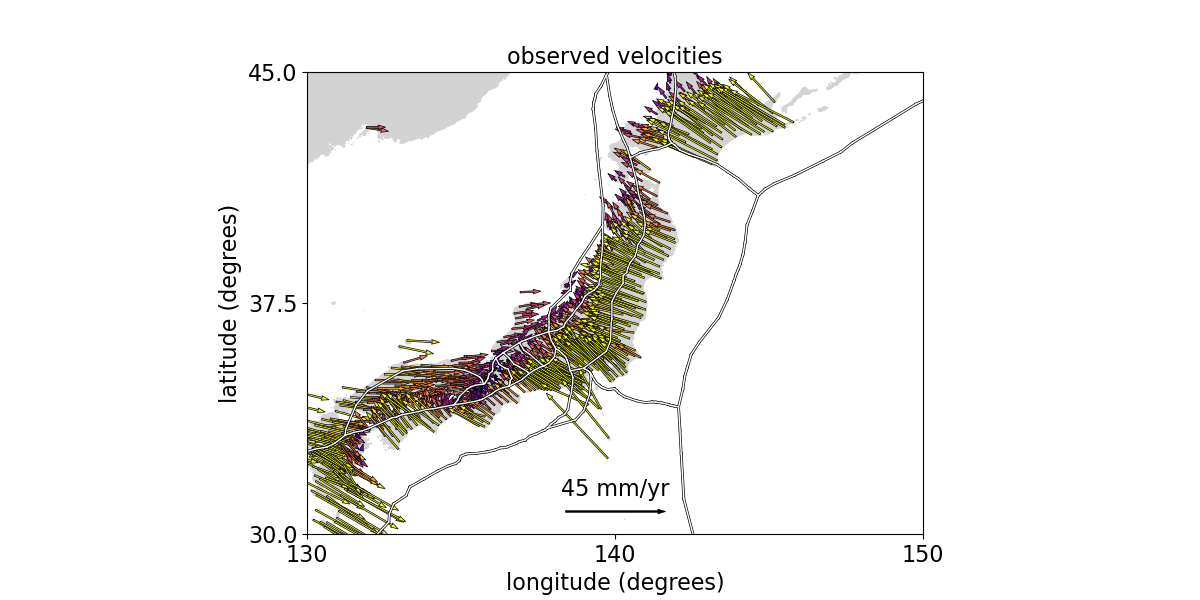

In [89]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    station.east_vel,
    station.north_vel,
    arrow_scale=1.0,
    title_string="observed velocities",
)

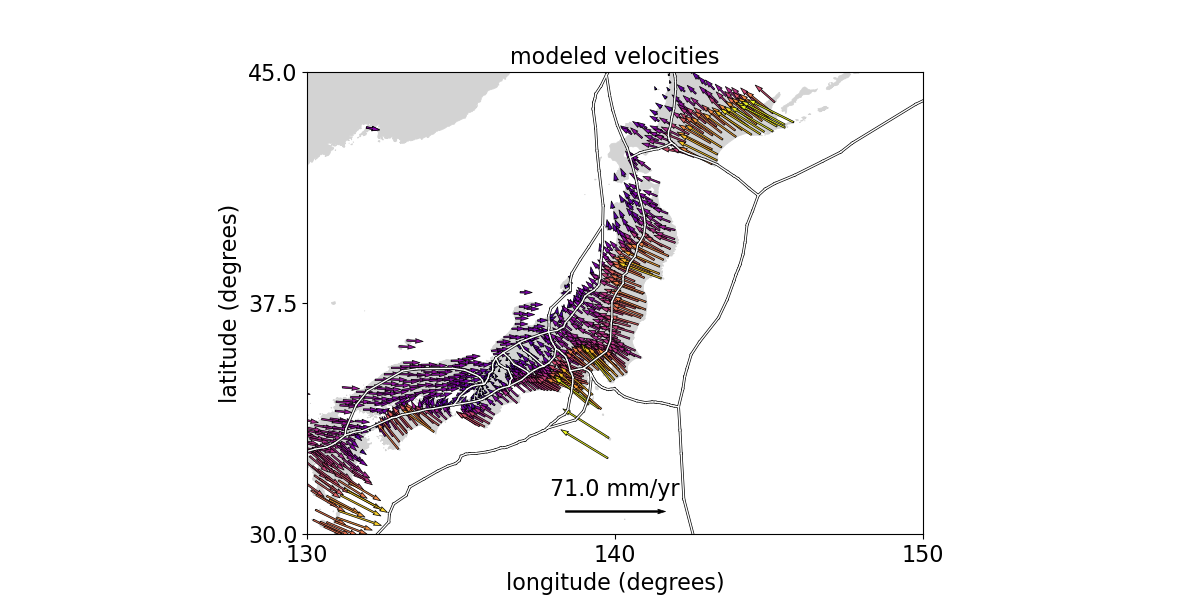

In [79]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel,
    estimation.north_vel,
    arrow_scale=1.0,
    title_string="modeled velocities",
)

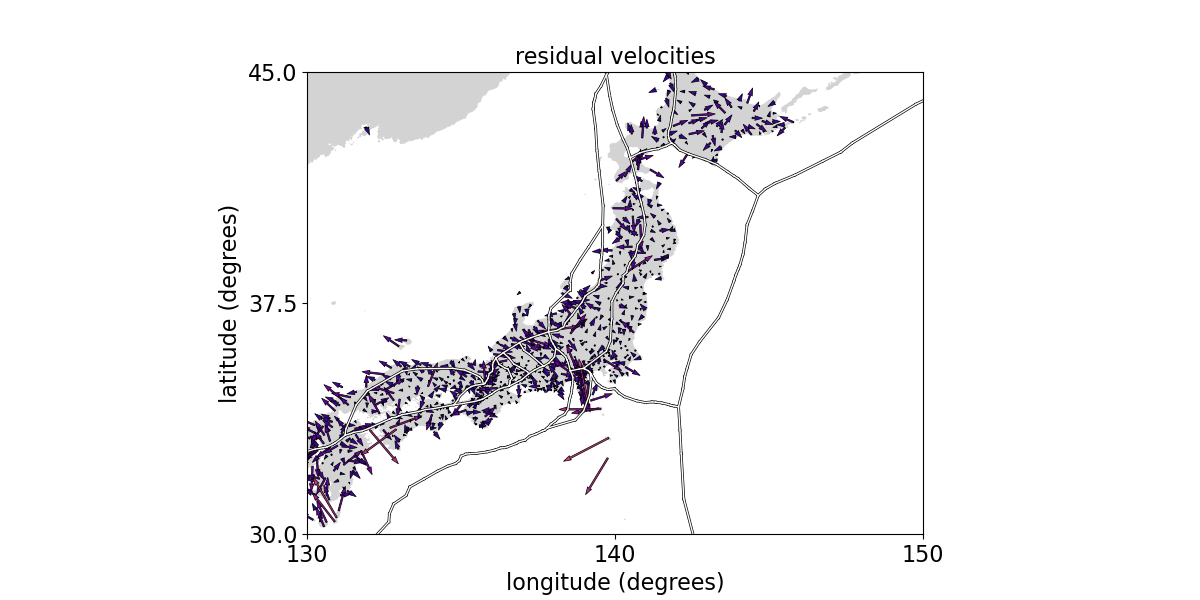

In [36]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel_residual,
    estimation.north_vel_residual,
    arrow_scale=0.25,
    title_string="residual velocities",
)

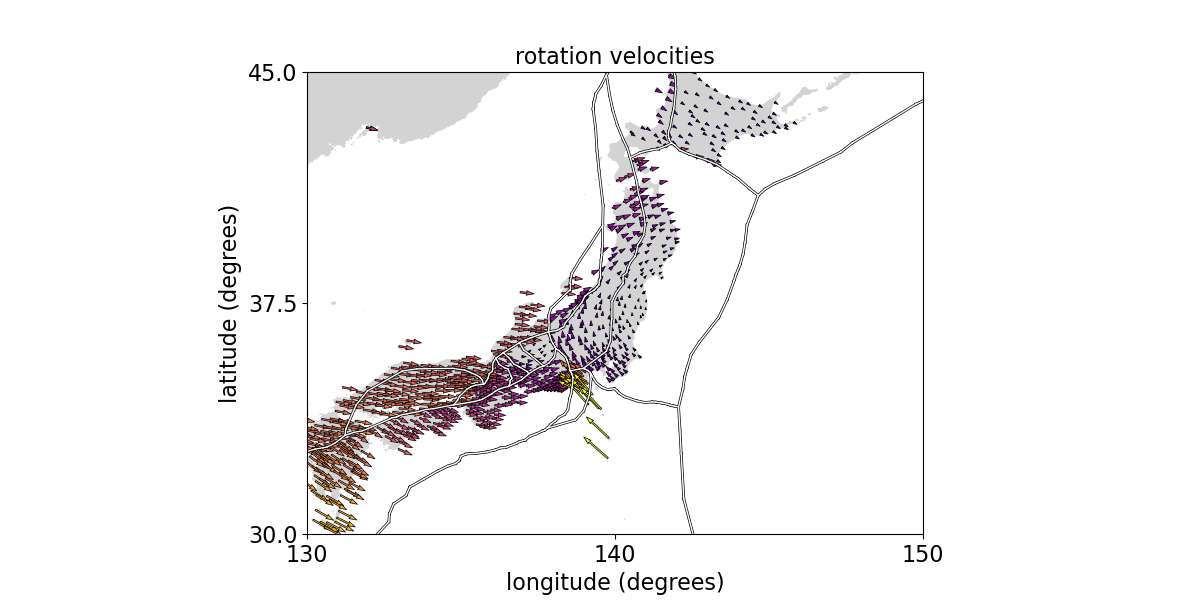

In [31]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel_rotation,
    estimation.north_vel_rotation,
    arrow_scale=1.0,
    title_string="rotation velocities",
)

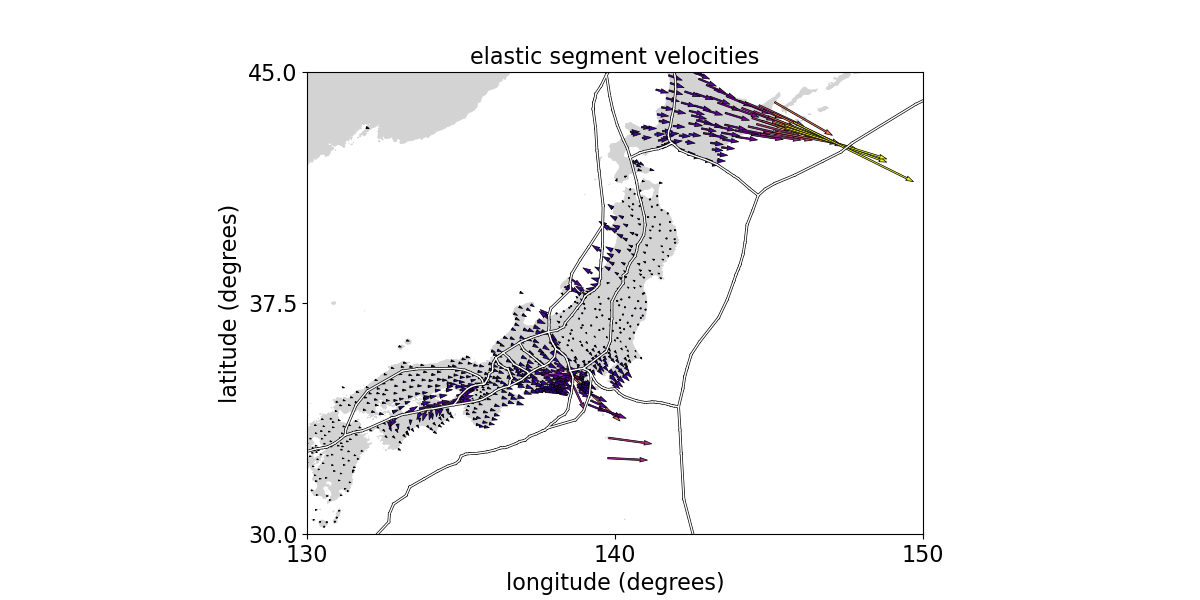

In [32]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel_elastic_segment,
    estimation.north_vel_elastic_segment,
    arrow_scale=0.25,
    title_string="elastic segment velocities",
)

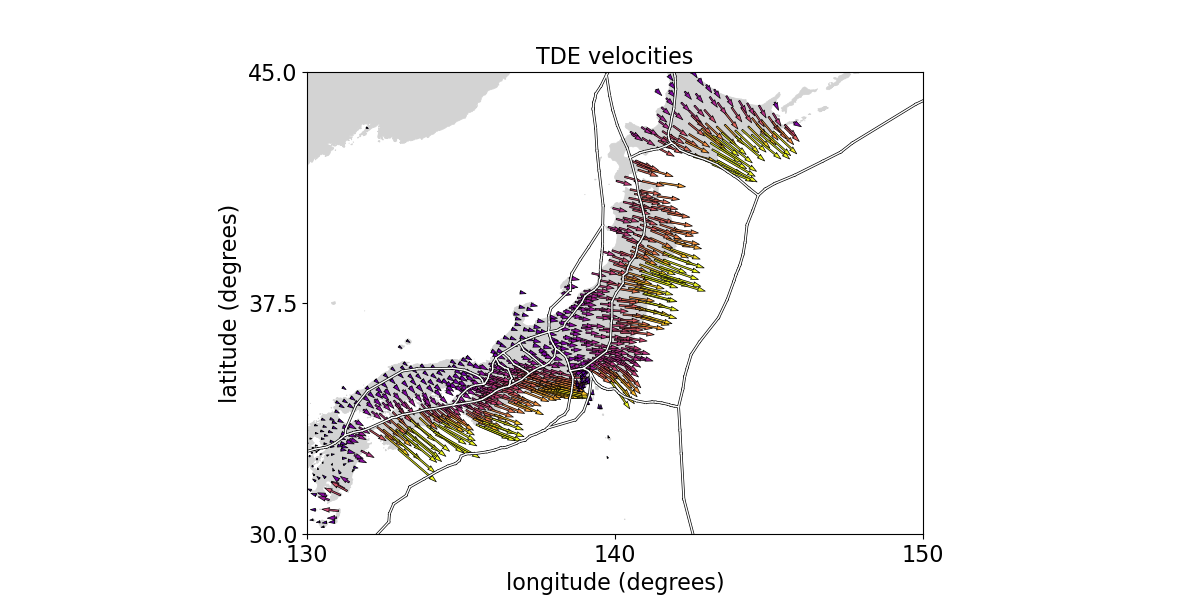

In [37]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel_tde,
    estimation.north_vel_tde,
    arrow_scale=0.75,
    title_string="TDE velocities",
)

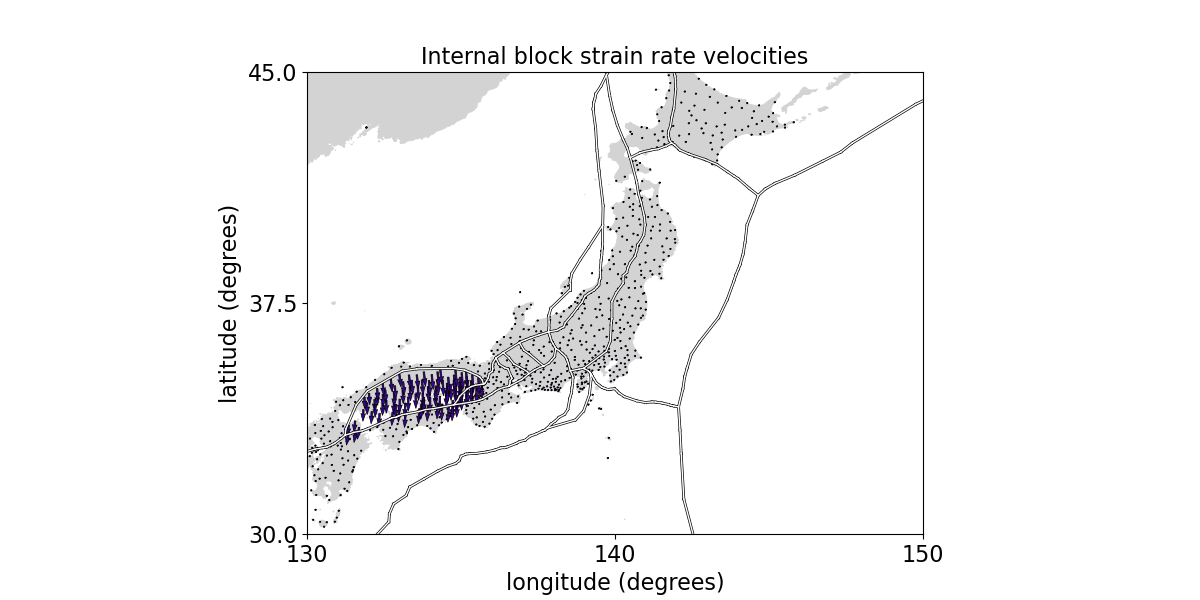

In [39]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel_block_strain_rate,
    estimation.north_vel_block_strain_rate,
    arrow_scale=0.15,
    title_string="Internal block strain rate velocities",
)

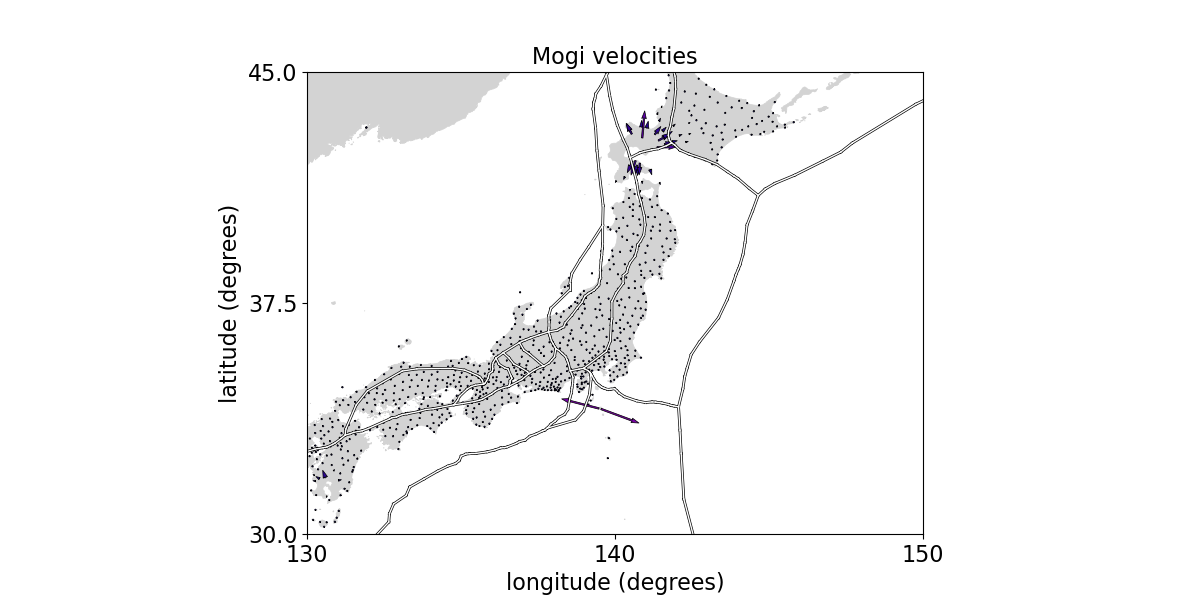

In [40]:
plot_vels(
    p,
    segment,
    station.lon,
    station.lat,
    estimation.east_vel_mogi,
    estimation.north_vel_mogi,
    arrow_scale=0.15,
    title_string="Mogi velocities",
)

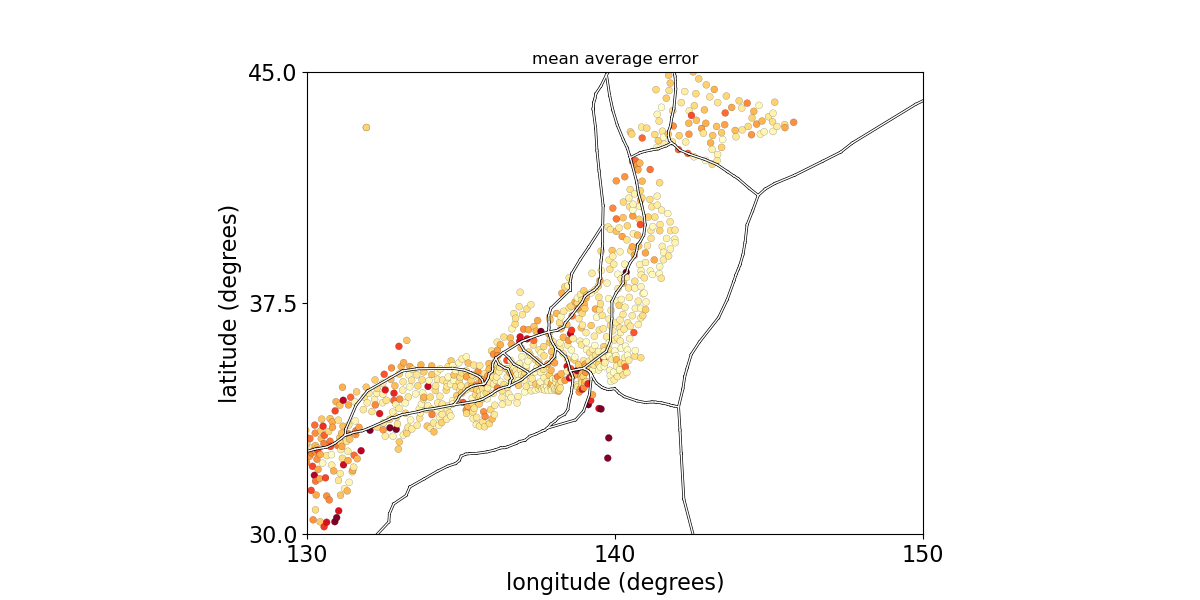

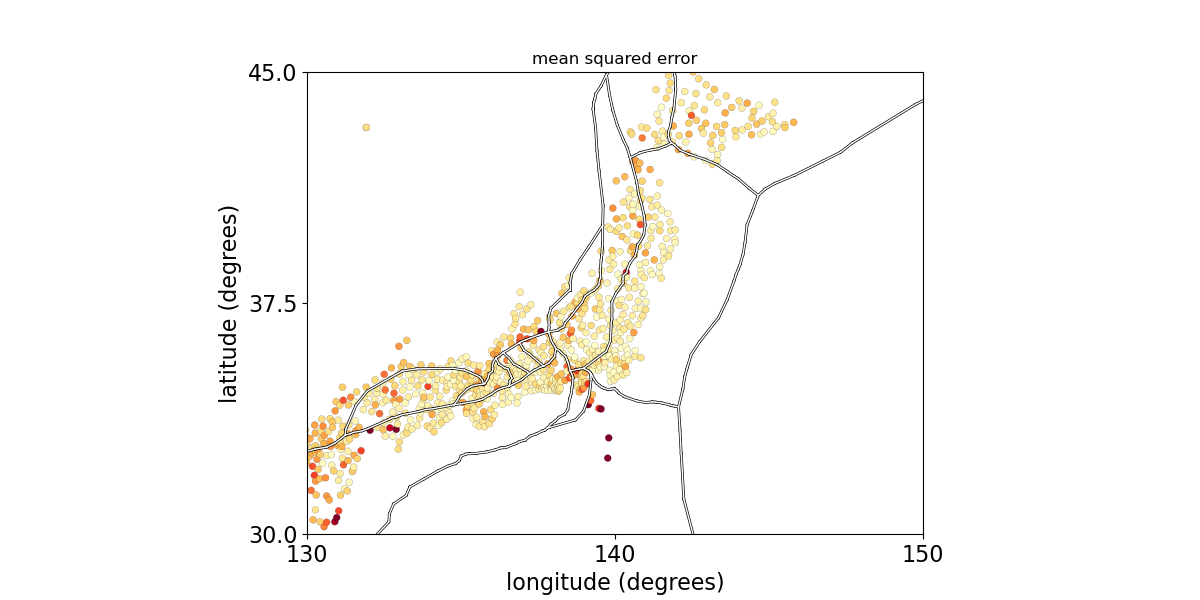

In [34]:
def plot_residuals(p, segment, station):
    """
    Plots the residuals of east and north velocity estimates as scatter plots with
    mean absolute error (MAE) and mean squared error (MSE) for a given station.

    The function creates two plots:
    1. A scatter plot of the station locations colored by MAE.
    2. A scatter plot of the station locations colored by MSE.

    Parameters:
    -----------
    p : object
        An object containing plot configurations such as figure size, longitude range,
        and latitude range.
    segment : object
        An object representing a specific segment of data or region to be plotted.
    station : DataFrame
        A pandas DataFrame containing the station data with columns 'lon' and 'lat' for
        longitude and latitude respectively.

    Returns:
    --------
    None
    """

    mae = np.abs(estimation.east_vel_residual.values) + np.abs(
        estimation.north_vel_residual.values
    )
    mse = np.sqrt(
        estimation.east_vel_residual.values**2.0
        + estimation.north_vel_residual.values**2.0
    )

    plt.figure(figsize=p.FIGSIZE_VECTORS)
    plt.scatter(
        station.lon,
        station.lat,
        s=25,
        edgecolors="k",
        c=mae,
        cmap="YlOrRd",
        linewidths=0.1,
    )
    plot_common_elements(p, segment, p.LON_RANGE, p.LAT_RANGE)
    plt.clim(0, 10)
    plt.title("mean average error")
    plt.show()

    plt.figure(figsize=p.FIGSIZE_VECTORS)
    plt.scatter(
        station.lon,
        station.lat,
        s=25,
        edgecolors="k",
        c=mse,
        cmap="YlOrRd",
        linewidths=0.1,
    )
    plot_common_elements(p, segment, p.LON_RANGE, p.LAT_RANGE)
    plt.clim(0, 10)
    plt.title("mean squared error")
    plt.show()


# Plot estimated strike-slip rates
plot_residuals(p, segment, station)

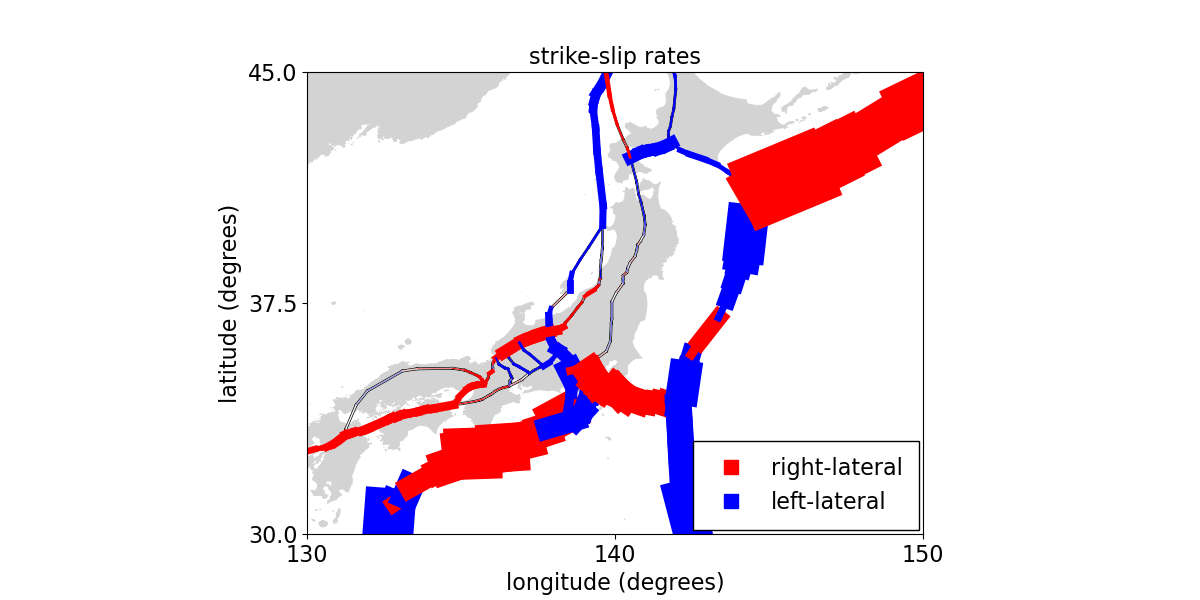

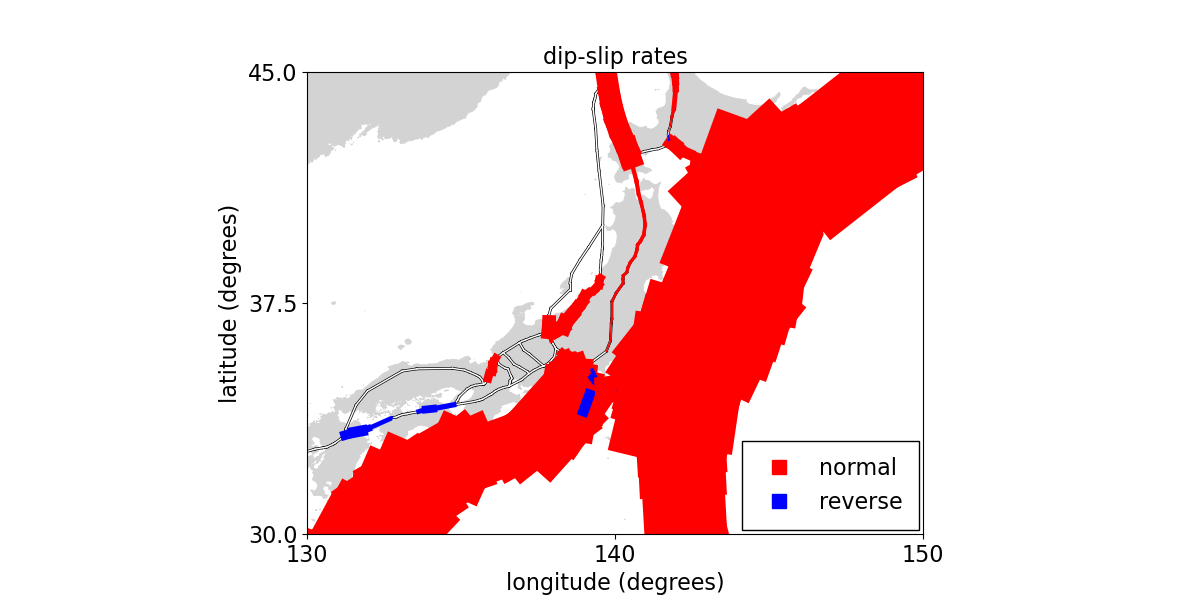

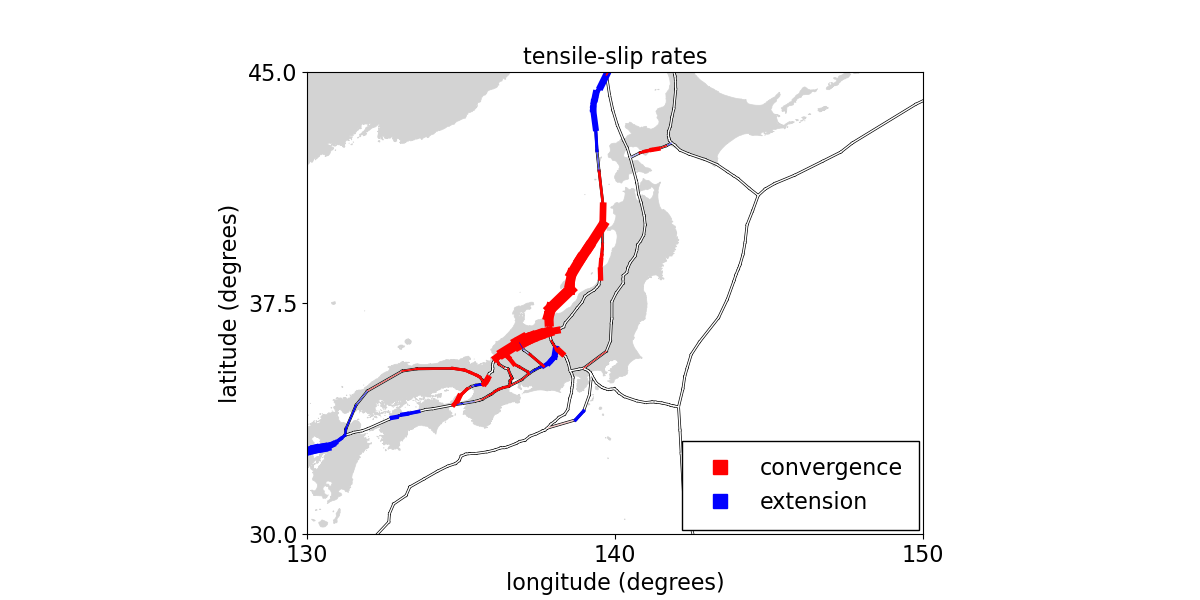

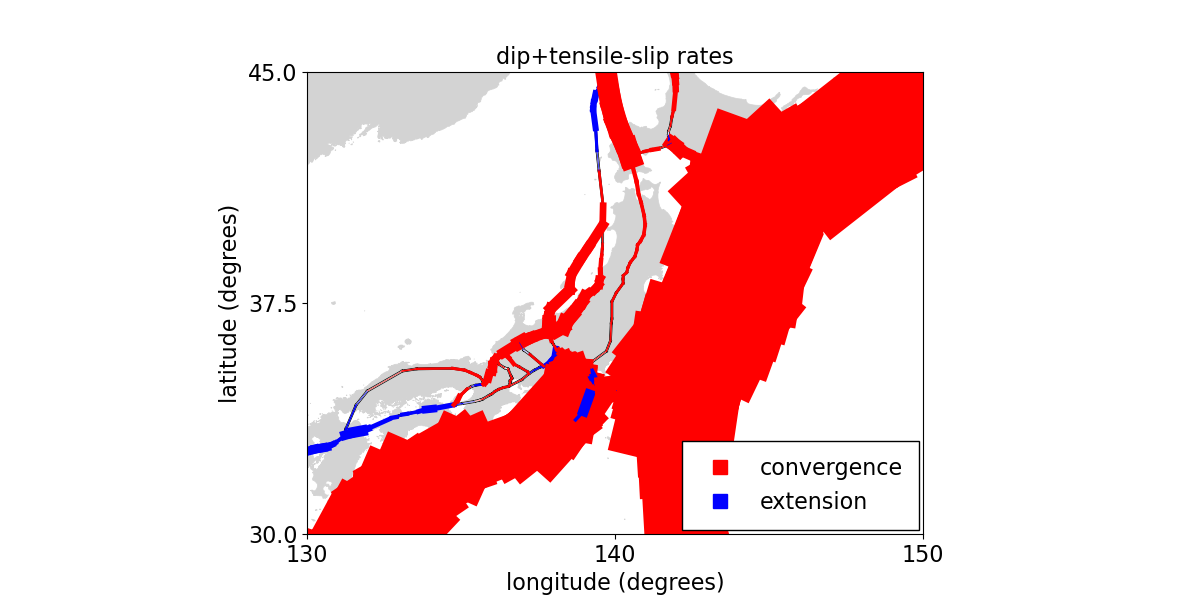

In [35]:
def plot_segment_rates(p, segment, rate_type, rate_scale=1):
    """
    Plots the slip rates (strike-slip, dip-slip, tensile-slip, or a combination of dip and tensile slip)
    for given segments on a map.

    The function creates a plot with segments color-coded and line width scaled based on the slip rates.
    The colors represent:
    - Red: Negative rates (right-lateral for strike-slip, normal for dip-slip, convergence for tensile-slip, convergence for combination)
    - Blue: Positive rates (left-lateral for strike-slip, reverse for dip-slip, extension for tensile-slip, extension for combination)

    A legend is added to distinguish the negative and positive rates.

    Parameters:
    -----------
    p : object
        An object containing plot configurations such as figure size, fonts, colors, and map boundaries.
    segment : DataFrame
        A pandas DataFrame containing segment data with columns 'lon1', 'lon2', 'lat1', and 'lat2' for
        the start and end coordinates of each segment.
    rate_type : str
        A string indicating the type of slip rate to plot. Can be one of:
        - 'ss'   : strike-slip rates
        - 'ds'   : dip-slip rates
        - 'ts'   : tensile-slip rates
        - 'dsts' : combination of dip-slip and tensile-slip rates
    rate_scale : float, optional
        A scaling factor for the slip rate line widths, default is 1.

    Returns:
    --------
    None
    """
    plt.figure(figsize=p.FIGSIZE_VECTORS)

    if rate_type == "ss":
        plt.title("strike-slip rates", fontsize=p.FONTSIZE)
        label_text_negative = "right-lateral"
        label_text_positive = "left-lateral"
    elif rate_type == "ds":
        plt.title("dip-slip rates", fontsize=p.FONTSIZE)
        label_text_negative = "normal"
        label_text_positive = "reverse"
    elif rate_type == "ts":
        plt.title("tensile-slip rates", fontsize=p.FONTSIZE)
        label_text_negative = "convergence"
        label_text_positive = "extension"
    elif rate_type == "dsts":
        plt.title("dip+tensile-slip rates", fontsize=p.FONTSIZE)
        label_text_negative = "convergence"
        label_text_positive = "extension"

    plot_common_elements(p, segment, p.LON_RANGE, p.LAT_RANGE)

    plt.fill(
        p.WORLD_BOUNDARIES["lon"],
        p.WORLD_BOUNDARIES["lat"],
        color=p.LAND_COLOR,
        linewidth=p.LAND_LINEWIDTH,
        zorder=p.LAND_ZORDER,
    )

    for i in range(len(segment)):
        if rate_type == "ss":
            if estimation.strike_slip_rates[i] < 0:
                plt.plot(
                    [segment.lon1[i], segment.lon2[i]],
                    [segment.lat1[i], segment.lat2[i]],
                    "-r",
                    linewidth=rate_scale * estimation.strike_slip_rates[i],
                )
            else:
                plt.plot(
                    [segment.lon1[i], segment.lon2[i]],
                    [segment.lat1[i], segment.lat2[i]],
                    "-b",
                    linewidth=rate_scale * estimation.strike_slip_rates[i],
                )

        if rate_type == "ds":
            if estimation.dip_slip_rates[i] < 0:
                plt.plot(
                    [segment.lon1[i], segment.lon2[i]],
                    [segment.lat1[i], segment.lat2[i]],
                    "-b",
                    linewidth=rate_scale * estimation.dip_slip_rates[i],
                )
            else:
                plt.plot(
                    [segment.lon1[i], segment.lon2[i]],
                    [segment.lat1[i], segment.lat2[i]],
                    "-r",
                    linewidth=rate_scale * estimation.dip_slip_rates[i],
                )

        if rate_type == "ts":
            if estimation.tensile_slip_rates[i] < 0:
                plt.plot(
                    [segment.lon1[i], segment.lon2[i]],
                    [segment.lat1[i], segment.lat2[i]],
                    "-r",
                    linewidth=rate_scale * estimation.tensile_slip_rates[i],
                )
            else:
                plt.plot(
                    [segment.lon1[i], segment.lon2[i]],
                    [segment.lat1[i], segment.lat2[i]],
                    "-b",
                    linewidth=rate_scale * estimation.tensile_slip_rates[i],
                )

        if rate_type == "dsts":
            if (estimation.dip_slip_rates[i] - estimation.tensile_slip_rates[i]) < 0:
                plt.plot(
                    [segment.lon1[i], segment.lon2[i]],
                    [segment.lat1[i], segment.lat2[i]],
                    "-b",
                    linewidth=rate_scale
                    * (estimation.dip_slip_rates[i] - estimation.tensile_slip_rates[i]),
                )
            else:
                plt.plot(
                    [segment.lon1[i], segment.lon2[i]],
                    [segment.lat1[i], segment.lat2[i]],
                    "-r",
                    linewidth=rate_scale
                    * (estimation.dip_slip_rates[i] - estimation.tensile_slip_rates[i]),
                )

    # Legend
    black_segments = mlines.Line2D(
        [],
        [],
        color="red",
        marker="s",
        linestyle="None",
        markersize=10,
        label=label_text_negative,
    )
    red_segments = mlines.Line2D(
        [],
        [],
        color="blue",
        marker="s",
        linestyle="None",
        markersize=10,
        label=label_text_positive,
    )
    plt.legend(
        handles=[black_segments, red_segments],
        loc="lower right",
        fontsize=p.FONTSIZE,
        framealpha=1.0,
        edgecolor="k",
    ).get_frame().set_boxstyle("Square")


# Plot estimated strike-slip rates
plot_segment_rates(p, segment, "ss", rate_scale=1)
plot_segment_rates(p, segment, "ds", rate_scale=1)
plot_segment_rates(p, segment, "ts", rate_scale=1)
plot_segment_rates(p, segment, "dsts", rate_scale=1)